In [ ]:
import numpy as np # Работа с массивами данных
import pandas as pd # Работа с табличными данными
from tensorflow.keras import utils # Функции-утилиты для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate # Основные слои
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D # Основные слои
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop # Оптимизаторы
from tensorflow.keras.preprocessing.text import Tokenizer # Токенизатор для преобразование текстов в последовательности
from sklearn.preprocessing import StandardScaler # Масштабирование данных
import gdown # Загрузка датасетов из облака google
import re # Регулярные выражения
import matplotlib.pyplot as plt # Отрисовка графиков
from sklearn.metrics import mean_squared_error, mean_absolute_error # Метрики для расчета ошибок
%matplotlib inline

In [ ]:
# Подключить Google диск
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
       

Mounted at /content/drive


In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/OneGA/t1_20220101_20220726_rg_201589066.csv', index_col=0)
len(df_1)

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder                       # Импортируем модуль preprocessing в котором хранится LabelEncoder
label_encoder = preprocessing.LabelEncoder() 
df_1.head(2)
df_1.info()

FileNotFoundError: ignored

In [ ]:
y = df_1.iloc[:,14].astype(str)    #target column
#for i in y:
#y[i] = y[i].apply(str)
y = y.apply(str)
print(y)
#y.head()
#display(y)
#print(y.dtype)

0          []
1          []
2          []
3         [0]
4          []
         ... 
361914    [0]
361915     []
361916     []
361917     []
361918     []
Name: ym:s:goalsPrice, Length: 361919, dtype: object


In [ ]:
list123 = [0, 1, 2, 3, 4, 5, 6]

for i in list123:
  print(y[i])

[]
[]
[]
[0]
[]
[]
[]


In [ ]:
y = y.str.contains('201589066').map({True: 1, False: 0}) # map each value in the column to 0 or 1
print(y.unique())

In [ ]:
cols_number = 6
print(cols_number)
cols = ['ym:s:browser', 'ym:s:browserCountry', 'ym:s:browserLanguage', 'ym:s:date', 'ym:s:endURL', 'ym:s:firstGCLID', 'ym:s:goalsDateTime', 'ym:s:goalsID', 'ym:s:goalsPrice', 'ym:s:goalsSerialNumber', 'ym:s:hasGCLID', 'ym:s:impressionsProductCoupon', 'ym:s:ipAddress', 'ym:s:isNewUser', 'ym:s:javascriptEnabled', 'ym:s:lastAdvEngine', 'ym:s:lastClickBannerGroupName', 'ym:s:lastDirectBannerGroup', 'ym:s:lastDirectClickBanner', 'ym:s:lastDirectClickBannerName', 'ym:s:lastDirectClickOrder', 'ym:s:lastDirectClickOrderName', 'ym:s:lastDirectConditionType', 'ym:s:lastDirectPhraseOrCond', 'ym:s:lastDirectPlatform', 'ym:s:lastDirectPlatformType', 'ym:s:lastGCLID', 'ym:s:lastReferalSource', 'ym:s:lastSearchEngine', 'ym:s:lastSearchEngineRoot', 'ym:s:lastSignificantGCLID', 'ym:s:lastSocialNetwork', 'ym:s:lastSocialNetworkProfile', 'ym:s:lastTrafficSource', 'ym:s:mobilePhone', 'ym:s:networkType', 'ym:s:offlineCallFirstTimeCaller', 'ym:s:offlineCallHoldDuration', 'ym:s:offlineCallMissed', 'ym:s:offlineCallTag', 'ym:s:offlineCallTalkDuration', 'ym:s:offlineCallURL', 'ym:s:openstatAd', 'ym:s:openstatCampaign', 'ym:s:openstatService', 'ym:s:openstatSource', 'ym:s:pageViews', 'ym:s:referer', 'ym:s:regionCity', 'ym:s:screenHeight', 'ym:s:screenOrientation', 'ym:s:screenWidth', 'ym:s:startURL', 'ym:s:UTMCampaign', 'ym:s:UTMContent', 'ym:s:UTMMedium', 'ym:s:UTMSource', 'ym:s:UTMTerm', 'ym:s:visitDuration', 'ym:s:visitID', 'ym:s:watchIDs']
#, 'ym:s:from'
len(cols)

6


61

In [ ]:
#df_1[6] = df_1[6].str.contains('newsapp').map({True: 1, False: 0}) # map each value in the column to 0 or 1
# Создаем объект label_encoder
cols = ['ym:s:browser', 'ym:s:browserCountry', 'ym:s:browserLanguage', 'ym:s:date', 'ym:s:endURL', 'ym:s:firstGCLID', 'ym:s:goalsDateTime', 'ym:s:goalsID', 'ym:s:goalsPrice', 'ym:s:goalsSerialNumber', 'ym:s:hasGCLID', 'ym:s:impressionsProductCoupon', 'ym:s:ipAddress', 'ym:s:isNewUser', 'ym:s:javascriptEnabled', 'ym:s:lastAdvEngine', 'ym:s:lastClickBannerGroupName', 'ym:s:lastDirectBannerGroup', 'ym:s:lastDirectClickBanner', 'ym:s:lastDirectClickBannerName', 'ym:s:lastDirectClickOrder', 'ym:s:lastDirectClickOrderName', 'ym:s:lastDirectConditionType', 'ym:s:lastDirectPhraseOrCond', 'ym:s:lastDirectPlatform', 'ym:s:lastDirectPlatformType', 'ym:s:lastGCLID', 'ym:s:lastReferalSource', 'ym:s:lastSearchEngine', 'ym:s:lastSearchEngineRoot', 'ym:s:lastSignificantGCLID', 'ym:s:lastSocialNetwork', 'ym:s:lastSocialNetworkProfile', 'ym:s:lastTrafficSource', 'ym:s:mobilePhone', 'ym:s:networkType', 'ym:s:offlineCallFirstTimeCaller', 'ym:s:offlineCallHoldDuration', 'ym:s:offlineCallMissed', 'ym:s:offlineCallTag', 'ym:s:offlineCallTalkDuration', 'ym:s:offlineCallURL', 'ym:s:openstatAd', 'ym:s:openstatCampaign', 'ym:s:openstatService', 'ym:s:openstatSource', 'ym:s:pageViews', 'ym:s:referer', 'ym:s:regionCity', 'ym:s:screenHeight', 'ym:s:screenOrientation', 'ym:s:screenWidth', 'ym:s:startURL', 'ym:s:UTMCampaign', 'ym:s:UTMContent', 'ym:s:UTMMedium', 'ym:s:UTMSource', 'ym:s:UTMTerm', 'ym:s:visitDuration', 'ym:s:visitID', 'ym:s:watchIDs']
#, 'ym:s:from'
#cols1 = cols[cols_number]
#print(cols_number)
#print(cols1)
cols_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
#, 30
for cols123 in cols_list:
  a123 = cols[cols123]
  df_1[a123]= label_encoder.fit_transform(df_1[a123])
  print(cols123)
  print(a123)

# Часть настроенная
#a = 'ym:s:from'
#df_1 = df_1.drop(columns=a)
#b = 'ym:s:lastSignificantGCLID'
#df_1 = df_1.drop(columns=b)

df_1.head(2)


In [ ]:
# b123 = cols[6]
#  df_1[a123]= label_encoder.fit_transform(df_1[a123])

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361919 entries, 0 to 361918
Data columns (total 67 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0.1                     361919 non-null  int64  
 1   ym:s:bounce                      361919 non-null  int64  
 2   ym:s:browser                     361919 non-null  int64  
 3   ym:s:browserCountry              361919 non-null  int64  
 4   ym:s:browserLanguage             361919 non-null  int64  
 5   ym:s:clientID                    361919 non-null  uint64 
 6   ym:s:cookieEnabled               361919 non-null  int64  
 7   ym:s:date                        361919 non-null  int64  
 8   ym:s:deviceCategory              361919 non-null  int64  
 9   ym:s:endURL                      361919 non-null  int64  
 10  ym:s:firstGCLID                  361919 non-null  int64  
 11  ym:s:from                        19 non-null      object 
 12  ym

In [ ]:
df_1.to_csv('/content/drive/My Drive/df_5.csv')
#print(datetime.now())
#print(cols_number)

print(df_1['ym:s:browser'].unique())
print(df_1.columns[2])

[ 5 48 36  6 23 45 35 37  1 11 15 19 49 17 30 26 28  2 16 18 43 29 27 31
 40 46 44 24 34  0 42  8 10  3 39 22  9  7 32 38  4 41 47 25 14 21 13 33
 20 12]
ym:s:browser


# Продолжение

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361919 entries, 0 to 361918
Data columns (total 65 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0.1                     361919 non-null  int64  
 1   ym:s:bounce                      361919 non-null  int64  
 2   ym:s:browser                     361919 non-null  int64  
 3   ym:s:browserCountry              361919 non-null  int64  
 4   ym:s:browserLanguage             361919 non-null  int64  
 5   ym:s:cookieEnabled               361919 non-null  int64  
 6   ym:s:date                        361919 non-null  int64  
 7   ym:s:deviceCategory              361919 non-null  int64  
 8   ym:s:endURL                      361919 non-null  int64  
 9   ym:s:firstGCLID                  361919 non-null  int64  
 10  ym:s:goalsDateTime               361919 non-null  int64  
 11  ym:s:goalsID                     361919 non-null  int64  
 12  ym

In [ ]:
#x_1 = df_1.iloc[:,0:13]  #independent columns
#y = df_1.iloc[:,13].astype(str)    #target column
#z_1 = df_1.iloc[:,14:] 
#print(type(y[0]))
#display(y)
#y = y.str.contains('201589066').map({True: 1, False: 0}) # map each value in the column to 0 or 1
#display(y)
#X = pd.concat([x_1, z_1], axis=1)

#a = 'ym:s:from'
#df_1 = df_1.drop(columns=a)
#d = 'ym:s:clientID'
#df_1 = df_1.drop(columns=d)

x_1 = df_1.iloc[:,0:12]  #independent columns
#y = df_1.iloc[:,12].astype(str)    #target column    переносим в начало
z_1 = df_1.iloc[:,13:33] 
print(type(y[0]))
display(y)
#y = y.str.contains('201589066').map({True: 1, False: 0}) # map each value in the column to 0 or 1   переносим в начало
display(y)
X = pd.concat([x_1, z_1], axis=1)

KeyError: ignored

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

Empty DataFrame
Columns: [Specs, Score]
Index: []


In [ ]:
X.to_csv('/content/drive/My Drive/X.csv')
y.to_csv('/content/drive/My Drive/y.csv')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


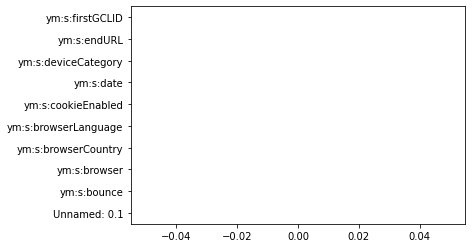

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Создание Модели

In [ ]:
#Создание Модели

# Дополнительно

In [ ]:
def goal_id(x):
    if isinstance(x, str):                # Если значение - строка:
        # Замена концов строк на пробелы, удаление символа с кодом 0xA0,
        # обрезка краевых пробелов и приведение к нижнему регистру
        x = x.replace('\n', ' ').replace('\xa0', '').strip().lower()
    return x
    # найти в строке символы последовательности из двух символов
    # и заменить их на пробелы
    # x = re.sub(r'\w \w', ' ', x)
    # найти в строке символы последовательности из трех символов и вернуть значение    # x = re.findall(r'\w \w \w', x)
    # вернуть значение
    # return x

x = "[66245989,45605569,66245989,45085622,66245989,152446093]"
x1 = re.findall()


TypeError: ignored